In [1]:
import os
os.chdir('C:\\users\\scuba\\pycharmprojects\\simplebacktester')
os.getcwd()

import pandas as pd
import ffn

%matplotlib inline

from backtest_helpers.compute_weights_RS_DM import compute_weights_RS_DM
from backtest_helpers.compute_weights_PMA import compute_weights_PMA
from backtest_helpers.monthly_return_table import monthly_return_table

strategies = {
    'RS0001': { 'symbols': ['VCVSX','VWEHX','VFIIX','FGOVX','VWAHX'], 'prices': 'yahoo',  
               'rs_lookback': 1, 'risk_lookback': 1, 'n_top': 2, 'frequency': 'm',
              'cash_proxy': 'CASHX', 'risk_free': 0},
    'RS0002': {'symbols': ['MMHYX','FAGIX','VFIIX'],  'prices': 'yahoo', 
               'rs_lookback': 3, 'risk_lookback': 2, 'n_top': 1, 'frequency': 'm',
              'cash_proxy': 'CASHX', 'risk_free': 0},
    'RS0003': {'symbols': ['MMHYX','FAGIX','VFIIX'], 'prices': 'yahoo', 
               'rs_lookback': 1, 'risk_lookback': 1, 'n_top': 1, 'frequency': 'q',
              'cash_proxy': 'CASHX', 'risk_free': 0},    
    'DM0001': {'symbols': ['VCVSX','VWINX','VWEHX','VGHCX','VUSTX','VFIIX','VWAHX','FGOVX','FFXSX'],
                'prices': 'yahoo', 
               'rs_lookback': 1, 'risk_lookback': 1, 'n_top': 3, 'frequency': 'm',
              'cash_proxy': 'CASHX', 'risk_free': 'FFXSX'},
    'DM0002': {'symbols': ['VCVSX','VUSTX','VWEHX','VFIIX','VGHCX','FRESX'], 'prices': 'yahoo', 
               'rs_lookback': 1, 'risk_lookback': 1, 'n_top': 5, 'frequency': 'm',
              'cash_proxy': 'VFIIX', 'risk_free': 'FFXSX'},
    'PMA001': {'symbols': ['VCVSX', 'VFIIX'],  'prices': 'yahoo', 
               'risk_lookback': 3, 'frequency': 'm', 'allocations': [0.6, 0.4],
              'cash_proxy': 'VUSTX'},
    'PMA002': {'symbols': ['VCVSX', 'VWINX', 'VWEHX'], 'prices': 'yahoo', 
               'risk_lookback': 3, 'frequency': 'm', 'allocations': [0.6, 0.2, 0.2],
              'cash_proxy': 'VUSTX'},
    'PMA003': {'symbols': ['VCVSX', 'FAGIX', 'VGHCX'], 'prices': 'yahoo',  
               'risk_lookback': 2, 'frequency': 'm', 'allocations': [1./3., 1./3., 1./3.],
              'cash_proxy': 'VUSTX'},    
}

Strategy : RS0001
VCVSX
VWEHX


VFIIX


FGOVX


VWAHX


FIRST BUY DATE = 1986-07-31 00:00:00


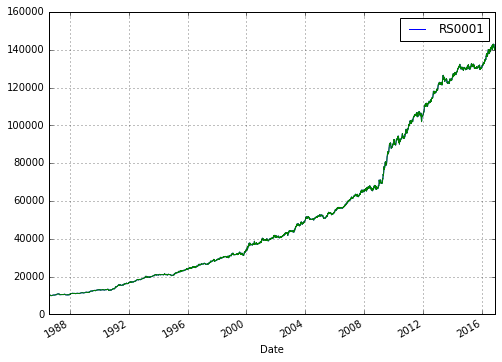

In [2]:
name = 'RS0001'

if 'PMA' in name :
    p_value, p_holdings, p_weights, prices =  compute_weights_PMA (name, strategies[name])
else :
    p_value, p_holdings, p_weights, prices =  compute_weights_RS_DM (name, strategies[name])
p_value.plot(figsize=(8, 6), grid=True)

In [3]:
ffn.calc_perf_stats(p_value).display()

Stats for None from 1986-07-31 00:00:00 - 2016-11-30 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
1304.96%            2.02  9.10%   -5.64%

Annualized Returns:
mtd     3m      6m     ytd    1y     3y     5y     10y    incep.
------  ------  -----  -----  -----  -----  -----  -----  --------
-0.68%  -0.62%  1.44%  7.33%  7.85%  4.17%  6.15%  8.88%  9.10%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  2.02     1.74       1.41
mean    8.80%    8.87%      9.29%
vol     4.35%    5.10%      6.58%
skew    -0.06    0.48       1.66
kurt    5.47     2.39       4.78
best    1.93%    8.13%      32.82%
worst   -2.74%   -3.83%     -0.97%

Drawdowns:
max     avg       # days
------  ------  --------
-5.64%  -0.72%     20.76

Misc:
---------------  ------
avg. up month    1.39%
avg. down month  -0.86%
up year %        96.67%
12m up %         98.31%
--

G:\Anaconda3\lib\site-packages\ffn\core.py:190: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  self.monthly_prices = obj.resample('M', how='last')
G:\Anaconda3\lib\site-packages\ffn\core.py:193: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  self.yearly_prices = obj.resample('A', how='last')


In [11]:
def highlight_pos_neg (s) :
    is_positive = s > 0    
    return ['background-color : rgb(127,255,0)' if v else 'background-color : rgb(255,99,71)' for v in is_positive]

df = monthly_return_table (p_value)

# df.style.\
#     apply(highlight_pos_neg)

print (df)

       Data                                                                    \
Month     1     2     3     4     5     6     7     8     9    10    11    12   
Year                                                                            
1986   0.00  0.00  0.00  0.00  0.00  0.00  0.00  2.27 -2.46  1.89  1.02  0.18   
1987   1.87  3.02  0.38 -3.63  0.00  0.00  0.97  1.25 -3.17  0.00  0.78  2.04   
1988   3.89  0.97 -0.31  0.00 -0.65  1.16 -0.67  0.42  1.74  2.30 -1.80  0.40   
1989   2.62 -0.52 -0.25  1.93  3.25  0.81  1.81  1.05 -0.90  2.13  1.00  0.70   
1990  -1.24  0.00  1.47 -1.48  1.19  0.41  1.73 -3.83  0.00  1.31  3.27  1.84   
1991   3.67  2.45  3.59  2.85  1.81 -2.42  1.21  2.76  1.59  1.17 -0.79  2.17   
1992   1.60  1.76 -0.78  0.84  1.93  1.55  3.65 -0.60  1.02  0.17  1.53  1.43   
1993   2.24  2.34 -0.62 -0.75  0.10  1.00  0.75  1.95  0.80  1.73 -0.55  0.00   
1994   1.39 -0.93  0.00  0.00  0.68 -0.53  0.45  0.08 -0.38  0.00 -2.27  0.57   
1995   2.31  2.95  0.96  0.0

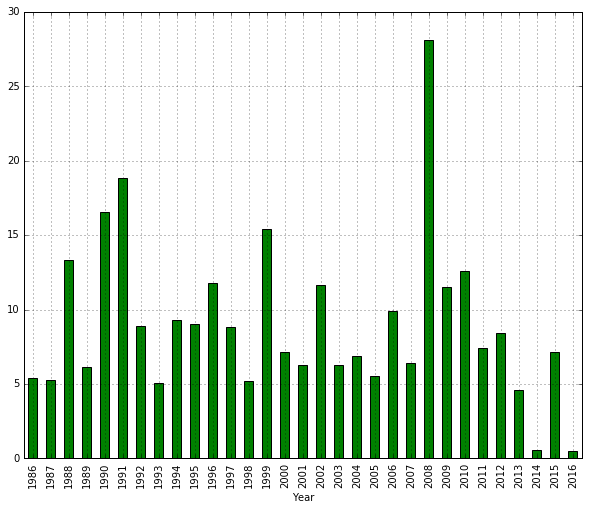

In [12]:
frame = df['Annual Returns'].to_frame()
frame['positive'] = df['Annual Returns'] >= 0
frame['Annual Returns'].plot(figsize=(10,8),kind='bar',color=frame.positive.map({True: 'g', False: 'r'}), grid=True)